# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    centeredFT = fftshift(If)
    return np.abs(centeredFT)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    centeredFT = fftshift(If)
    return np.log(1 + np.abs(centeredFT))
    # return fftshift(np.log(1 + np.abs(If)))

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

Image Originale


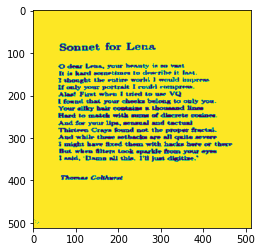

Image FT Log


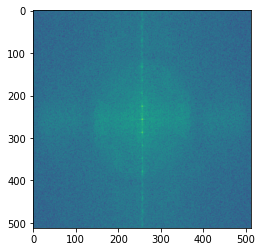

Thresholded FT Image


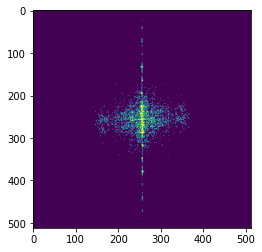

Image Originale


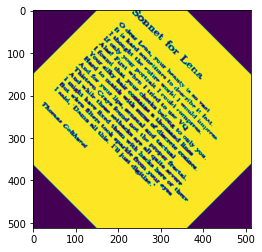

Image FT Log


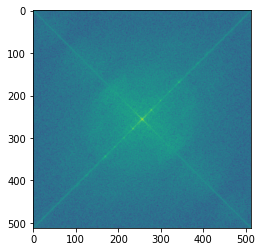

Thresholded FT Image


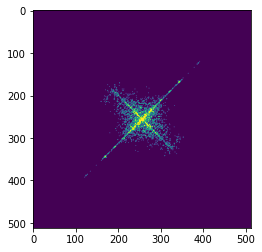

In [3]:
import matplotlib.pyplot as plt

def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where(I<=s, 0, 255)

for I in [son, sonrot]:
    print("Image Originale")
    plt.imshow(I)
    plt.show()

    If = computeFT(I)

    print("Image FT Log")
    plt.imshow(toVisualizeLogFT(If))
    plt.show()
    
    print("Thresholded FT Image")
    plt.imshow(thresholdImage(toVisualizeFT(If), 10**5))
    plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

En filtrant les valeurs supérieurs à $10^5$, on évite que la valeur du centre (extrêmement élevé) empêche de visualiser les valeurs plus petite. Ainsi cela permet de voir les détails importants.


4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [4]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    assert alpha <= 1 
    assert alpha >= 0 
    return alpha*I1 + (1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

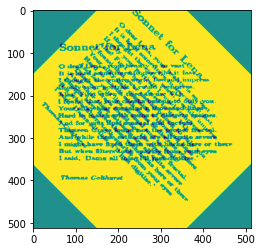

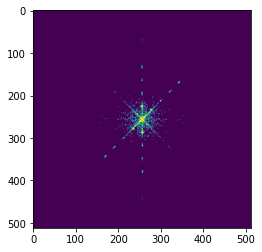

In [18]:
blended_img = blend(son, sonrot, 1/2)
plt.imshow(blended_img)
plt.show()
If = computeFT(blended_img)
If_toViz = toVisualizeFT(If)
plt.imshow(thresholdImage(If_toViz, 10**5))

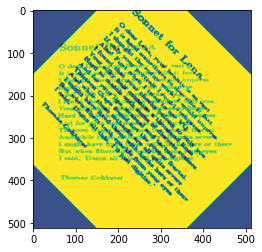

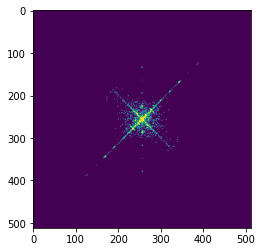

In [19]:
blended_img = blend(son, sonrot, 1/4)
plt.imshow(blended_img)
plt.show()
If = computeFT(blended_img)
If_toViz = toVisualizeFT(If)
plt.imshow(thresholdImage(If_toViz, 10**5))

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

On illustre ici la propriété de Linéarité de la transformé de Fourier. L'images "blended" doit être la somme des deux images précédentes. $\alpha$ contrôle la transparence de chaque image lors de la fusion. Ainsi, par linéarité lors de la transformé de Fourier, il vient pondérer les valeurs de chaque image.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

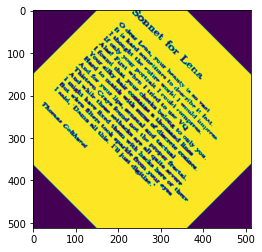

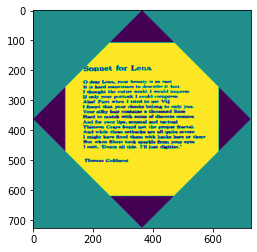

In [20]:
def mainOrientation(I, size=32):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    # size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

def rectifyOrientation(I, size=32):
    plt.imshow(I)
    plt.show()
    If = computeFT(I)
    If_toViz = toVisualizeFT(If)
    If_tresh = thresholdImage(If_toViz, 3*10**5)
    m_orientation = mainOrientation(If_tresh, size) # return a tuple 

    # plt.imshow(m_orientation[0])
    # plt.show()
    plt.imshow(rotateImage(I, -1*m_orientation[1]))
    plt.show()
rectifyOrientation(sonrot)

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

### Test avec sonrot2.png

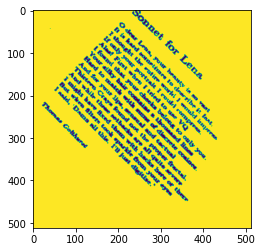

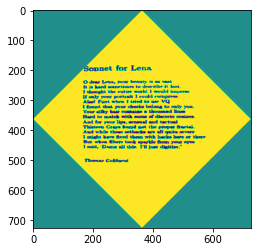

In [21]:
sonrot2 = np.array(Image.open("img/sonrot2.png"))
rectifyOrientation(sonrot2)

It worked too.
J'aurai pensé qu'il fallait changer quelque chose

### Test avec Port.jpg

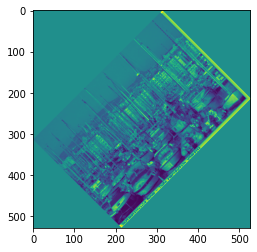

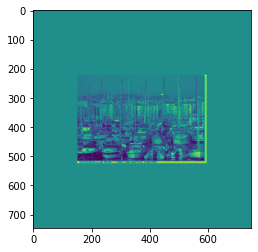

In [22]:
port = np.array(Image.open("img/port.jpg"))
rotated_port = rotateImage(port, 45)
rectifyOrientation(rotated_port)

Visiblement on peut détecter une orientation également dans une vrais image. De plus ici avec les bateaux les mats et les coques ont des orientations contradictoires. 

# Rotation supérieur à 180°

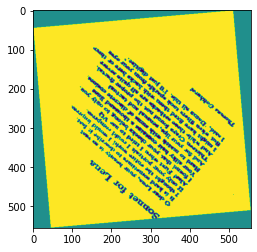

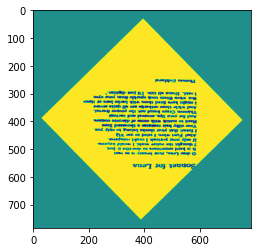

In [23]:
rotated = rotateImage(sonrot2, 185)
rectifyOrientation(rotated)

Je voulais tester et en effet il remet le texte à l'envers

Avec les bateaux

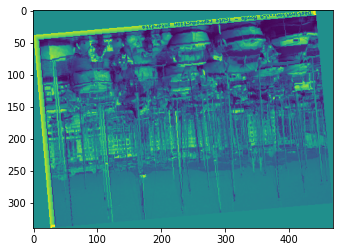

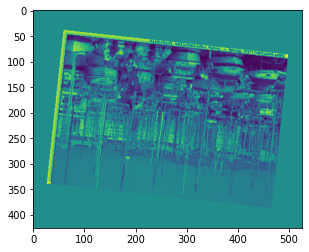

In [24]:
rotated_port = rotateImage(port, 185)
rectifyOrientation(rotated_port)

Ah ah il remet les manches droits excellent

### Autre image moins marquée

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

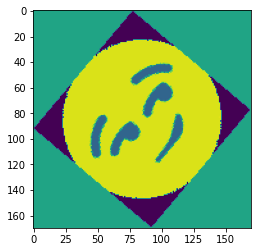

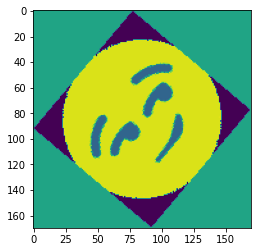

In [25]:
img = np.array(Image.open("img/smirk_emoji.png").convert('L'))
display(img)
rotated = rotateImage(img, 50)
rectifyOrientation(rotated)

Ca ne marche pas dommage, pourtant les traits de visage ont toutes la mêmes direction. Il faudrait rendre l'algo plus sensible.

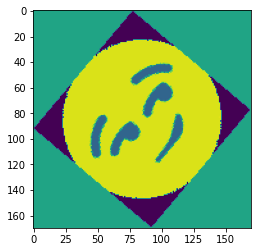

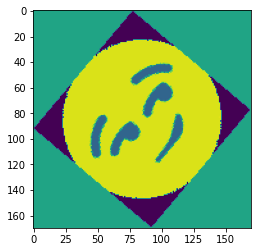

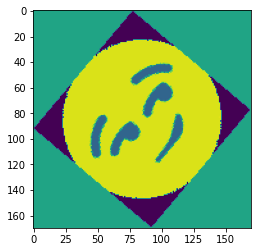

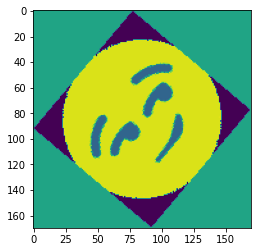

In [30]:
rectifyOrientation(rotated, size=128)
rectifyOrientation(rotated, size=8)

En tout cas c'est pas size qui change le niveau de sensibilité.